# EFSA_study
## A hypothetical toxicological in-vivo experiment

_Gugliemo Cassini, Alessandro Capici e Andrea Prati_


### Problem presentation
A substance X was adiministered to laboratory animals and three endopoint (1, 2 and 3) were measured. Eight groups of animals were tested, 4 groups of males and 4 groups of females.

For each gender, one group was used as a control and each remaining group received one of three doses of substance X (30 mg/kg, 100 mg/kg and 150 mg/kg, administered to each animal daily).
### The goal
It is requested to propose an appropriate statistical model and to analyse these data.

#### Libraries

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn
import xlrd
import time
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

import funzioni as fn

# Data visualization
Here the dataset

sex: 1 = female  
sex: 0 = male

In [94]:
data=pd.read_excel('../Data/Mini Project EFSA.xlsx')
data.rename(columns={'sex \n(0=M, 1=F)':'sex'}, inplace=True)
data

,response,number of animals,SD,dose,sex,endpoint
0,570.4,9,75.6,0,0,1
1,548.5,10,44.3,30,0,1
2,533.0,10,72.3,100,0,1
3,488.1,9,42.5,150,0,1
4,329.8,10,46.8,0,1,1
5,319.7,10,24.3,30,1,1
6,293.3,10,20.1,100,1,1
7,312.4,10,43.1,150,1,1
8,45.2,9,1.5,0,0,2
9,44.6,10,1.7,30,0,2


We plot the histograms in order to make some observations in advance

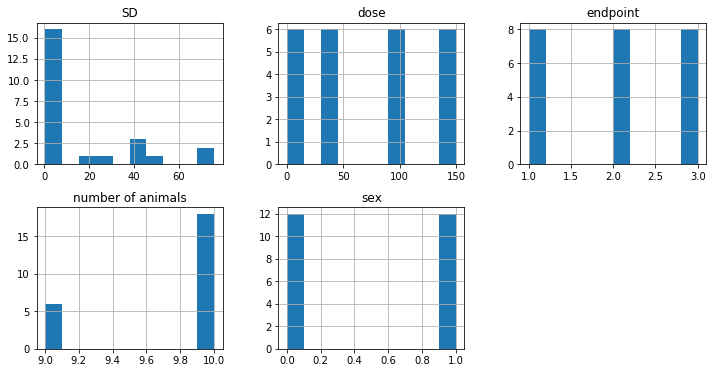

In [95]:
X = data.drop(columns = "response")
X.hist(figsize = (12, 6), layout=(2,3));

## Plot dose-response - request n°1
Plot dose-response data for each pair endpoint-gender (6 plots) with error bars reflecting error size on response measurements.
### Male graphs

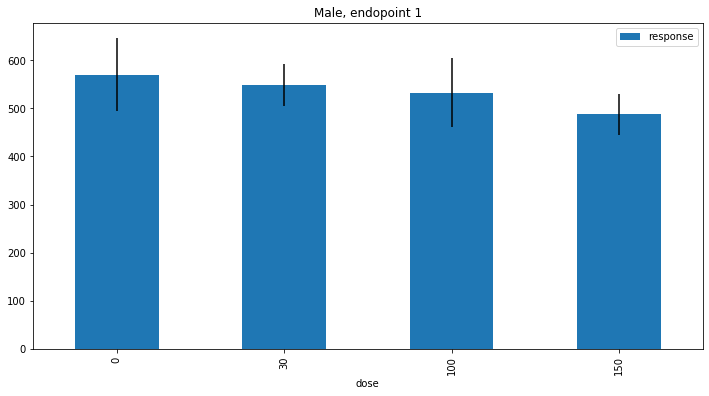

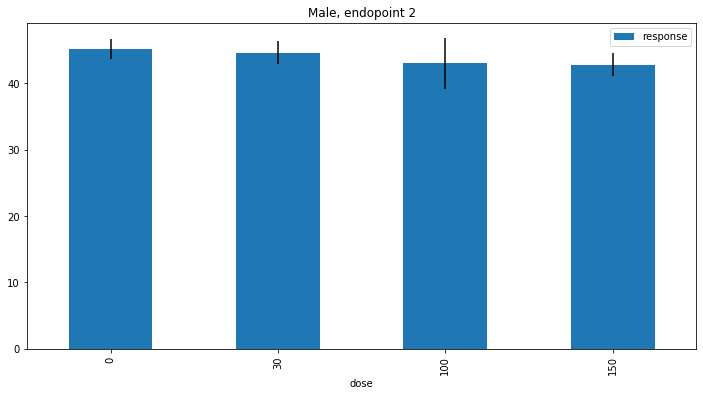

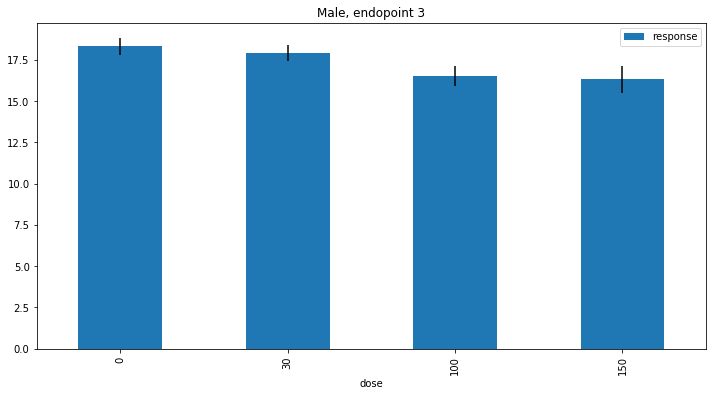

In [96]:
male_data=data[data.sex==0]

male_data_1=male_data[male_data.endpoint==1]
male_data_1.plot(x='dose',y='response',yerr='SD',kind='bar',figsize=(12,6), title = "Male, endopoint 1");

male_data_2=male_data[male_data.endpoint==2]
male_data_2.plot(x='dose',y='response',yerr='SD',kind='bar',figsize=(12,6), title = "Male, endopoint 2");

male_data_3=male_data[male_data.endpoint==3]
male_data_3.plot(x='dose',y='response',yerr='SD',kind='bar',figsize=(12,6), title = "Male, endopoint 3");

### Female graphs

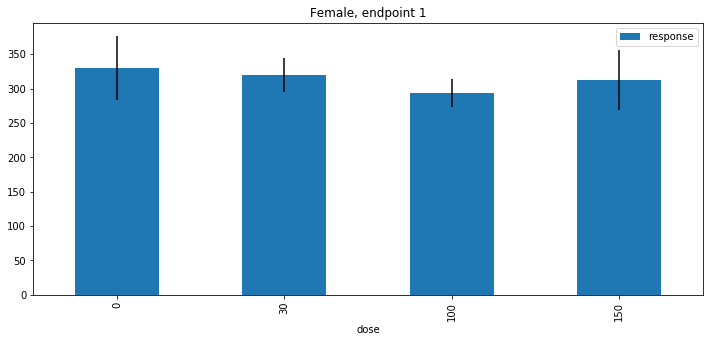

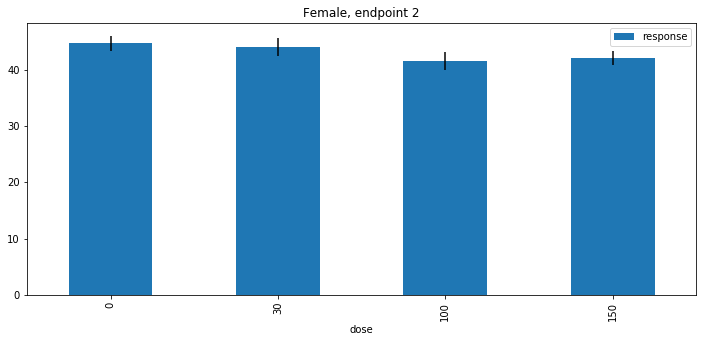

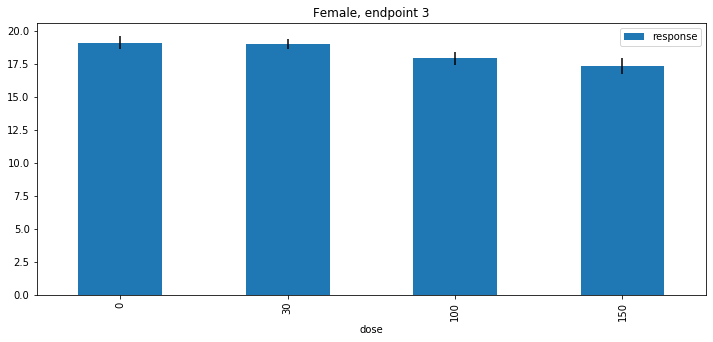

In [97]:
female_data=data[data.sex==1]

female_data_1=female_data[female_data.endpoint==1]
female_data_1.plot(x='dose',y='response',yerr='SD',kind='bar',figsize=(12, 5), title = "Female, endpoint 1");

female_data_2=female_data[female_data.endpoint==2]
female_data_2.plot(x='dose',y='response',yerr='SD',kind='bar',figsize=(12,5), title = "Female, endpoint 2");

female_data_3=female_data[female_data.endpoint==3]
female_data_3.plot(x='dose',y='response',yerr='SD',kind='bar',figsize=(12,5), title = "Female, endpoint 3");

# Model computing

We prepare our datasets in order to compute the models requested.

In [98]:
data_Endpoint1 = data[data.endpoint == 1]
data_Endpoint2 = data[data.endpoint == 2]
data_Endpoint3 = data[data.endpoint == 3]
criteriaToMin = ["bic","aic"]
criteriaToMax = ["adj_rsquare"]

#### How we have structured the analysis
For each section we will proceed this way:
- get the interested dataset
- perform stepwise forward selction
- perform stepwise backward selection
- plot the graph _RSS - number of features_ for both methods
- select the best model for each criteria (BIC, AIC, ADJ_RSQUARE)
- plot how each model perform using true response and predictions    

## Request n°2
Use subset selection to estimate separate models for the 3 endpoints using gender as categorical variable.

<a id='end1'></a>
### Endpoint 1

In [99]:
Y= data_Endpoint1.response
weights = data_Endpoint1.SD
X = data_Endpoint1.drop(columns=["response", "SD", "endpoint"])
X = X.reset_index().drop(columns=["index"])
Y = Y.reset_index(drop=True).drop(columns=["index"])

Data with endpoint value equal to 1.  
__Features are__: dose, number of animals and sex. 


The following code is needed to perform the third degree polynomials.

In [100]:
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)
cols = poly.get_feature_names(X.columns)
X = pd.DataFrame(X_poly, columns=cols)

We use the functions defined on the file "funzioni.py", to compute a set of models, some with the stepwise forward selection and others with stepwise backward selection.  

In [101]:
group_of_models_endpoint1_fw = fn.mainForward(X, Y, weights)
group_of_models_endpoint1_bw = fn.mainBackward(X, Y, weights)

group_of_models_endpoint1_fw = fn.compute_criteria(group_of_models_endpoint1_fw)
group_of_models_endpoint1_bw = fn.compute_criteria(group_of_models_endpoint1_bw)

Total elapsed time: 1.1107268333435059 seconds.
Total elapsed time: 1.1023528575897217 seconds.


Here we plot the graphs _RSS - number_ of predictors for both methods.

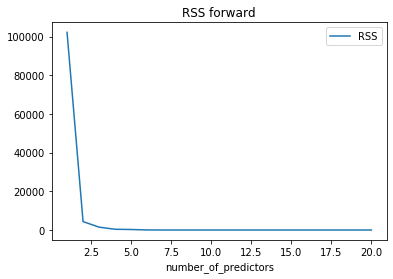

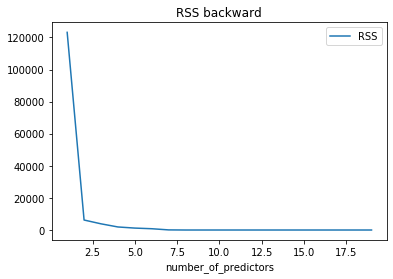

In [102]:
group_of_models_endpoint1_fw.plot(x='number_of_predictors', y='RSS', title = "RSS forward");
group_of_models_endpoint1_bw.plot(x='number_of_predictors', y='RSS', title = "RSS backward");

For each method result we select the best models according to the criteria: BIC, AIC and ADJ_RSQUARE.  
For the moment we separate forward's models and backward's.

In [103]:
best_models_bw = fn.selectBestForEachCriteria(group_of_models_endpoint1_bw, criteriaToMin, criteriaToMax)
best_models_fw = fn.selectBestForEachCriteria(group_of_models_endpoint1_fw, criteriaToMin, criteriaToMax)

According to the criterias we select the best models among all models

In [104]:
best_models_concat = pd.concat([best_models_fw, best_models_bw])
best_models_concat = best_models_concat.reset_index().drop(columns=["index"])
best_models_concat["adj_rsquare"] = best_models_concat["adj_rsquare"].astype("float64")
best_models_concat["bic"] = best_models_concat["bic"].astype("float64")
best_models_concat["aic"] = best_models_concat["aic"].astype("float64")
best_models_all = fn.selectBestForEachCriteria(best_models_concat, criteriaToMin, criteriaToMax)
best_models_all.to_pickle("./best_models_all_endopoint1.pkl")

Here the Dataframe that contains the best model for each criteria considered, among all models. 

In [105]:
best_models_all = pd.read_pickle("./best_models_all_endopoint1.pkl")
display(best_models_all[["RSS", "number_of_predictors", "name_of_predictors", "aic", "bic", "mse", "adj_rsquare"]]);

,RSS,number_of_predictors,name_of_predictors,aic,bic,mse,adj_rsquare
bic,1.50592e-22,13,"[1, number of animals, sex, number of animals ...",-379.912,-379.277,14601.6,NaN
aic,1.50592e-22,13,"[1, number of animals, sex, number of animals ...",-379.912,-379.277,14601.6,NaN
adj_rsquare,37.9373,6,"[1, sex, dose, dose^2 sex, number of animals^2...",47.155,47.6316,14601.6,0.998701


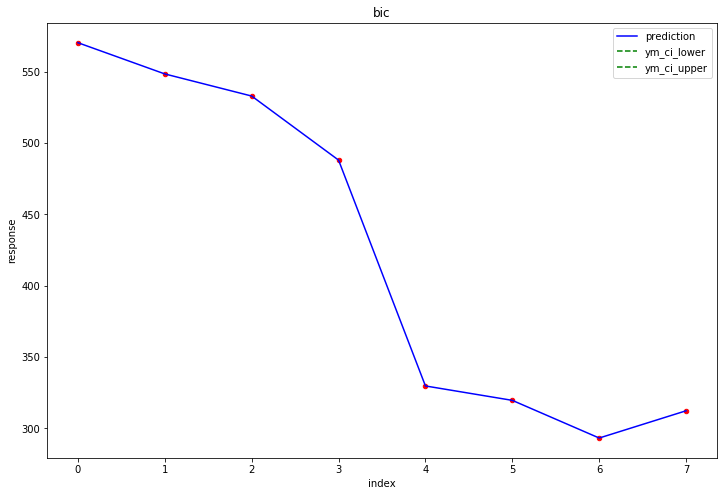

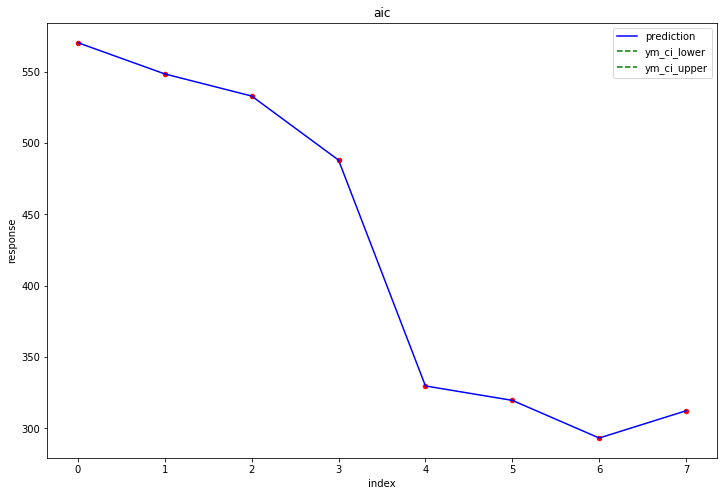

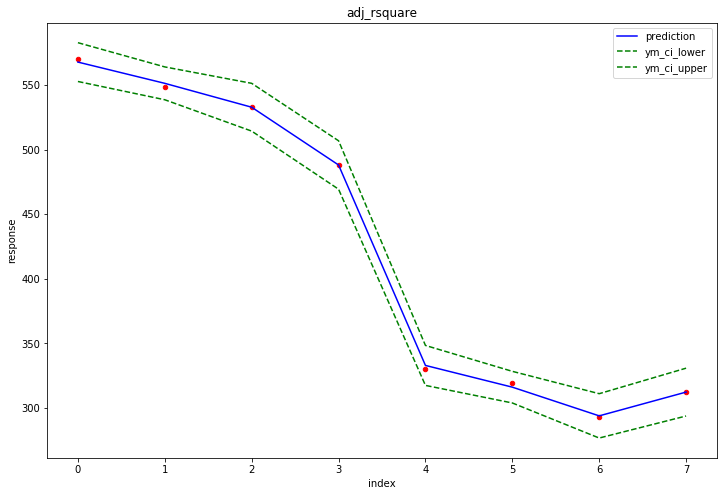

In [106]:
fn.plot_response_over_prediction(Y, best_models_all.loc["bic"]["Y_pred"], "bic", wrapper=best_models_all.loc["bic"].model)
fn.plot_response_over_prediction(Y, best_models_all.loc["aic"]["Y_pred"], "aic", wrapper=best_models_all.loc["aic"].model)
fn.plot_response_over_prediction(Y, best_models_all.loc["adj_rsquare"]["Y_pred"], "adj_rsquare", wrapper=best_models_all.loc["adj_rsquare"].model)

### Endpoint 2

In [107]:
Y = data_Endpoint2.response
weights = data_Endpoint2.SD
X = data_Endpoint2.drop(columns=["response", "SD", "endpoint"])
X = X.reset_index().drop(columns=["index"])
Y = Y.reset_index(drop=True).drop(columns=["index"])

Look at the comments at the _[Endpoint1](#end1)_ section

In [108]:
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)
cols = poly.get_feature_names(X.columns)
X = pd.DataFrame(X_poly, columns=cols)

In [109]:
group_of_models_endpoint2_fw = fn.mainForward(X, Y, weights)
group_of_models_endpoint2_bw = fn.mainBackward(X, Y, weights)

group_of_models_endpoint2_fw = fn.compute_criteria(group_of_models_endpoint2_fw)
group_of_models_endpoint2_bw = fn.compute_criteria(group_of_models_endpoint2_bw)

Total elapsed time: 1.1073830127716064 seconds.
Total elapsed time: 1.0597765445709229 seconds.


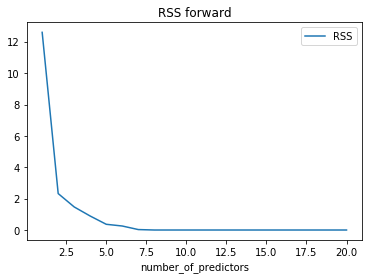

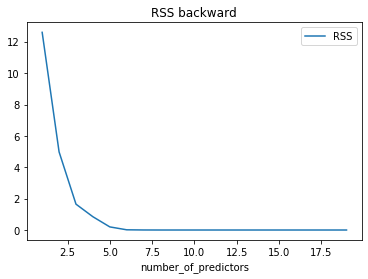

In [110]:
group_of_models_endpoint2_fw.plot(x='number_of_predictors', y='RSS', title = "RSS forward");
group_of_models_endpoint2_bw.plot(x='number_of_predictors', y='RSS', title = "RSS backward");

In [111]:
best_models_bw = fn.selectBestForEachCriteria(group_of_models_endpoint2_bw, criteriaToMin, criteriaToMax)
best_models_fw = fn.selectBestForEachCriteria(group_of_models_endpoint2_fw, criteriaToMin, criteriaToMax)

In [112]:
best_models_concat = pd.concat([best_models_fw, best_models_bw])
best_models_concat = best_models_concat.reset_index().drop(columns=["index"])

In [113]:
best_models_concat["adj_rsquare"] = best_models_concat["adj_rsquare"].astype("float64")
best_models_concat["bic"] = best_models_concat["bic"].astype("float64")
best_models_concat["aic"] = best_models_concat["aic"].astype("float64")
best_models_all = fn.selectBestForEachCriteria(best_models_concat, criteriaToMin, criteriaToMax)
best_models_all.to_pickle("./best_models_all_endopoint2.pkl")

In [114]:
best_models_all = pd.read_pickle("./best_models_all_endopoint2.pkl")
display(best_models_all[["RSS", "number_of_predictors", "name_of_predictors", "aic", "bic", "mse", "adj_rsquare"]])

,RSS,number_of_predictors,name_of_predictors,aic,bic,mse,adj_rsquare
bic,1.52976e-26,12,"[1, dose, sex, number of animals dose, number ...",-453.469,-452.834,1.8,NaN
aic,1.52976e-26,12,"[1, dose, sex, number of animals dose, number ...",-453.469,-452.834,1.8,NaN
adj_rsquare,0.254993,6,"[1, number of animals^2 dose, sex, dose^3, dos...",7.13532,7.61197,1.8,0.929169


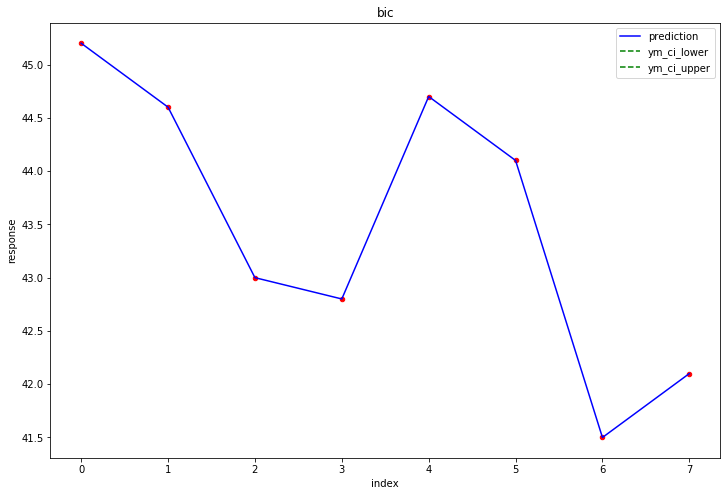

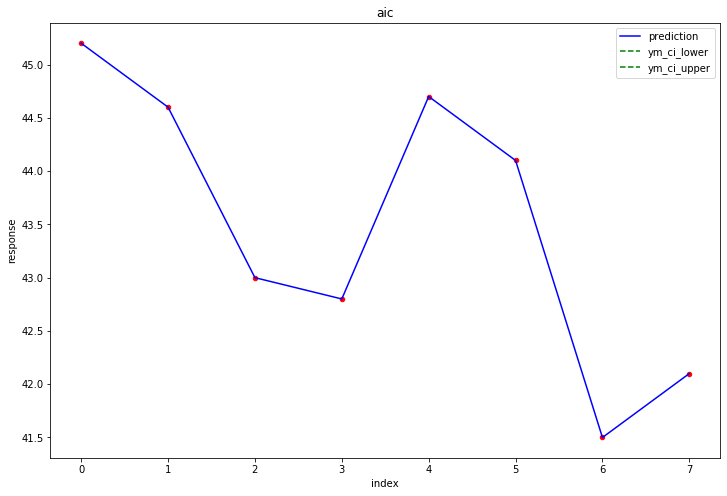

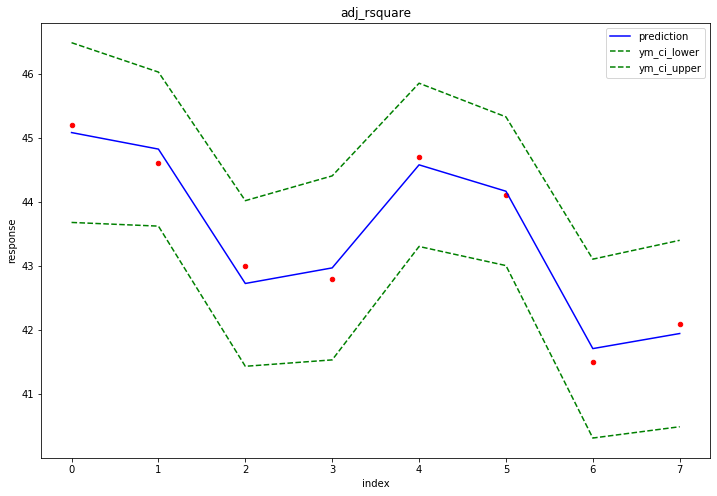

In [115]:
fn.plot_response_over_prediction(Y, best_models_all.loc["bic"]["Y_pred"], "bic", wrapper=best_models_all.loc["bic"].model)
fn.plot_response_over_prediction(Y, best_models_all.loc["aic"]["Y_pred"], "aic", wrapper=best_models_all.loc["aic"].model)
fn.plot_response_over_prediction(Y, best_models_all.loc["adj_rsquare"]["Y_pred"], "adj_rsquare", wrapper=best_models_all.loc["adj_rsquare"].model)

### Endpoint 3

In [116]:
Y= data_Endpoint3.response
weights = data_Endpoint3.SD
X = data_Endpoint3.drop(columns=["response", "SD", "endpoint"])
X = X.reset_index().drop(columns=["index"])
Y = Y.reset_index(drop=True).drop(columns=["index"])

Look at the comments at the _[Endpoint1](#end1)_ section

In [117]:
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)
cols = poly.get_feature_names(X.columns)
X = pd.DataFrame(X_poly, columns=cols)

In [118]:
group_of_models_endpoint3_fw = fn.mainForward(X, Y, weights)
group_of_models_endpoint3_bw = fn.mainBackward(X, Y, weights)

group_of_models_endpoint3_fw = fn.compute_criteria(group_of_models_endpoint3_fw)
group_of_models_endpoint3_bw = fn.compute_criteria(group_of_models_endpoint3_bw)

Total elapsed time: 1.3063011169433594 seconds.
Total elapsed time: 1.8083829879760742 seconds.


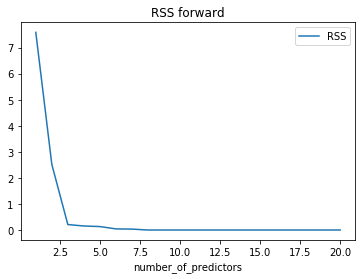

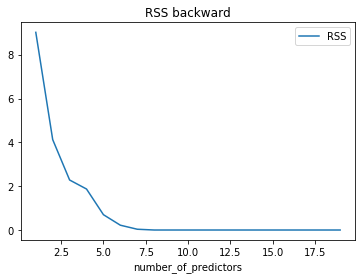

In [119]:
group_of_models_endpoint3_fw.plot(x='number_of_predictors', y='RSS', title = "RSS forward");
group_of_models_endpoint3_bw.plot(x='number_of_predictors', y='RSS', title = "RSS backward");

In [120]:
best_models_bw = fn.selectBestForEachCriteria(group_of_models_endpoint3_bw, criteriaToMin, criteriaToMax)
best_models_fw = fn.selectBestForEachCriteria(group_of_models_endpoint3_fw, criteriaToMin, criteriaToMax)

In [121]:
best_models_concat = pd.concat([best_models_fw, best_models_bw])
best_models_concat = best_models_concat.reset_index().drop(columns=["index"])

In [122]:
best_models_concat["adj_rsquare"] = best_models_concat["adj_rsquare"].astype("float64")
best_models_concat["bic"] = best_models_concat["bic"].astype("float64")
best_models_concat["aic"] = best_models_concat["aic"].astype("float64")
best_models_all = fn.selectBestForEachCriteria(best_models_concat, criteriaToMin, criteriaToMax)
best_models_all.to_pickle("./best_models_all_endopoint3.pkl")

In [123]:
best_models_all = pd.read_pickle("./best_models_all_endopoint3.pkl")
display(best_models_all[["RSS", "number_of_predictors", "name_of_predictors", "aic", "bic", "mse", "adj_rsquare"]]);

,RSS,number_of_predictors,name_of_predictors,aic,bic,mse,adj_rsquare
bic,4.40879e-26,13,"[number of animals, dose, sex, number of anima...",-445.001,-444.366,1.08411,NaN
aic,4.40879e-26,13,"[number of animals, dose, sex, number of anima...",-445.001,-444.366,1.08411,NaN
adj_rsquare,0.132278,5,"[1, dose, number of animals sex, number of ani...",-0.115289,0.281919,1.08411,0.959328


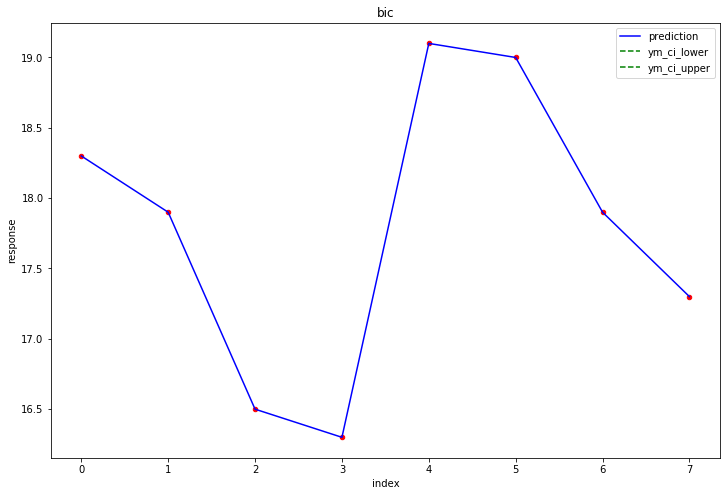

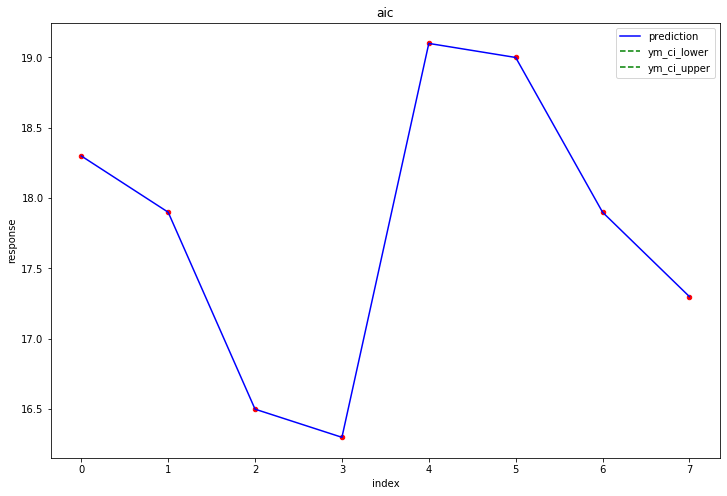

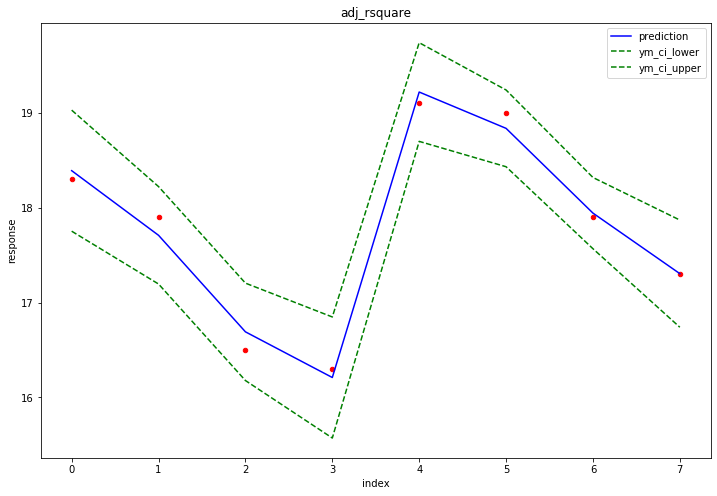

In [124]:
fn.plot_response_over_prediction(Y, best_models_all.loc["bic"]["Y_pred"], "bic", wrapper=best_models_all.loc["bic"].model)
fn.plot_response_over_prediction(Y, best_models_all.loc["aic"]["Y_pred"], "aic", wrapper=best_models_all.loc["aic"].model)
fn.plot_response_over_prediction(Y, best_models_all.loc["adj_rsquare"]["Y_pred"], "adj_rsquare", wrapper=best_models_all.loc["adj_rsquare"].model)

## Request n°3
Use subset selection to estimate a unique model using gender and endpoint as categorical variables.

In [125]:
Y = data.response
weights = data.SD
X = data.drop(columns=["response","SD"])

__Features are__: dose, number of animals, sex, endpoint1 and endpoint2.  
The feature _endpoint3_ is not needed because we can obtain that information looking at the other endpoints.

In [126]:
endpoint1 = X['endpoint'] == 1
endpoint2 = X['endpoint'] == 2
X["endpoint1"] = endpoint1.astype("int")
X["endpoint2"] = endpoint2.astype("int")
X = X.drop(columns=["endpoint"])
X = X.reset_index().drop(columns=["index"])
Y = Y.reset_index(drop=True).drop(columns=["index"])

In [127]:
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)
cols = poly.get_feature_names(X.columns)
X = pd.DataFrame(X_poly, columns=cols)

In [128]:
group_of_models_fw = fn.mainForward(X,Y,weights)
group_of_models_bw = fn.mainBackward(X,Y,weights)

group_of_models_fw = fn.compute_criteria(group_of_models_fw)
group_of_models_bw = fn.compute_criteria(group_of_models_bw)

Total elapsed time: 9.03491473197937 seconds.
Total elapsed time: 9.022288084030151 seconds.


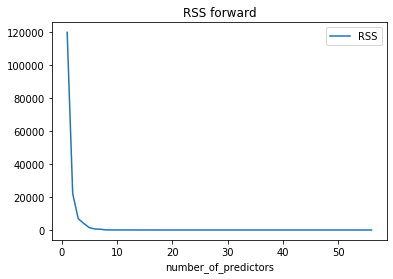

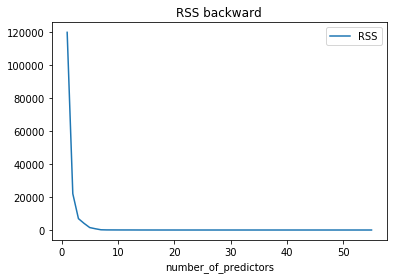

In [129]:
group_of_models_fw.plot(x='number_of_predictors', y='RSS', title = "RSS forward");
group_of_models_bw.plot(x='number_of_predictors', y='RSS', title = "RSS backward");

In [130]:
criteriaToMin = ["bic","aic"]
criteriaToMax = ["adj_rsquare"]
best_models_bw = fn.selectBestForEachCriteria(group_of_models_bw, criteriaToMin, criteriaToMax)
best_models_fw = fn.selectBestForEachCriteria(group_of_models_fw, criteriaToMin, criteriaToMax)
best_models_concat =pd.concat([best_models_fw, best_models_bw])
best_models_concat = best_models_concat.reset_index().drop(columns=["index"])

In [131]:
best_models_concat["adj_rsquare"] = best_models_concat["adj_rsquare"].astype("float64")
best_models_concat["bic"] = best_models_concat["bic"].astype("float64")
best_models_concat["aic"] = best_models_concat["aic"].astype("float64")
best_models_all = fn.selectBestForEachCriteria(best_models_concat, criteriaToMin, criteriaToMax)
best_models_all.to_pickle("./best_models_all.pkl")


In [132]:
best_models_all = pd.read_pickle("./best_models_all.pkl")
display(best_models_all[["RSS", "number_of_predictors", "name_of_predictors", "aic", "bic", "mse", "adj_rsquare"]])

,RSS,number_of_predictors,name_of_predictors,aic,bic,mse,adj_rsquare
bic,88.8893,9,"[endpoint1, sex endpoint1, endpoint2, dose end...",117.533,128.136,65034.3,0.999909
aic,53.7501,13,"[endpoint1, sex endpoint1, endpoint2, dose end...",113.46,128.775,40512,0.999879
adj_rsquare,88.8893,9,"[endpoint1, sex endpoint1, endpoint2, dose end...",117.533,128.136,65034.3,0.999909


In [133]:
best_models_all = pd.read_pickle("./best_models_all.pkl")

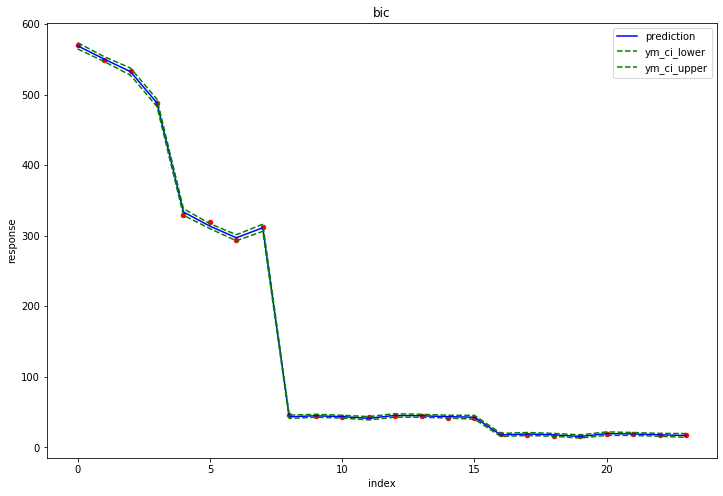

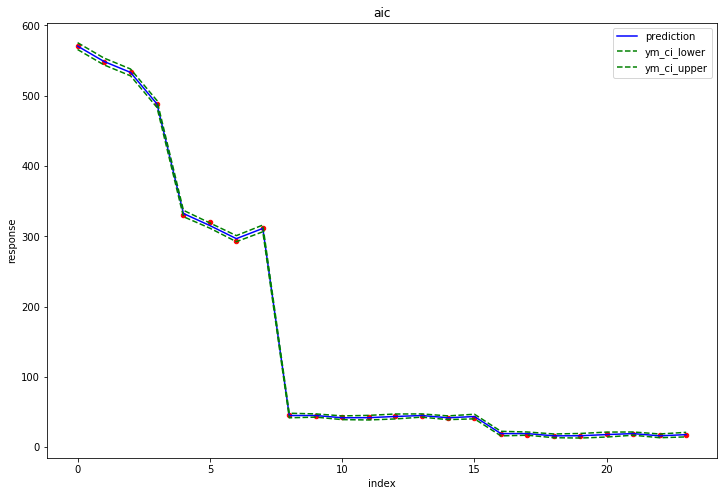

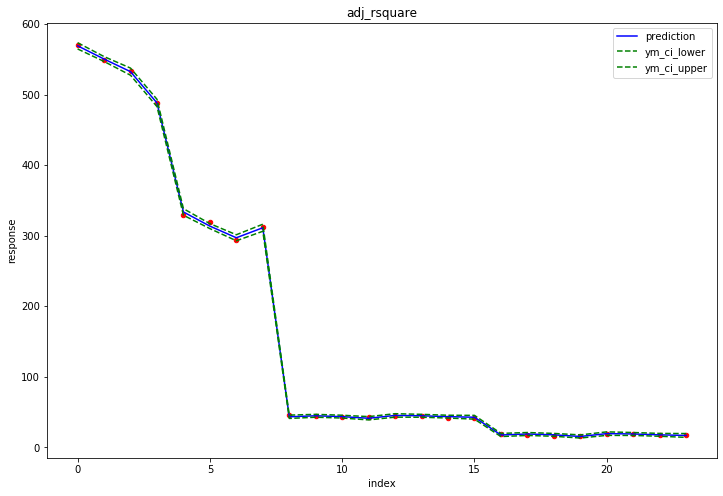

In [134]:
fn.plot_response_over_prediction(Y, best_models_all.loc["bic"]["Y_pred"], "bic", wrapper=best_models_all.loc["bic"].model)
fn.plot_response_over_prediction(Y, best_models_all.loc["aic"]["Y_pred"], "aic", wrapper=best_models_all.loc["aic"].model)
fn.plot_response_over_prediction(Y, best_models_all.loc["adj_rsquare"]["Y_pred"], "adj_rsquare", wrapper=best_models_all.loc["adj_rsquare"].model)